In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

### a) Frag. length freq

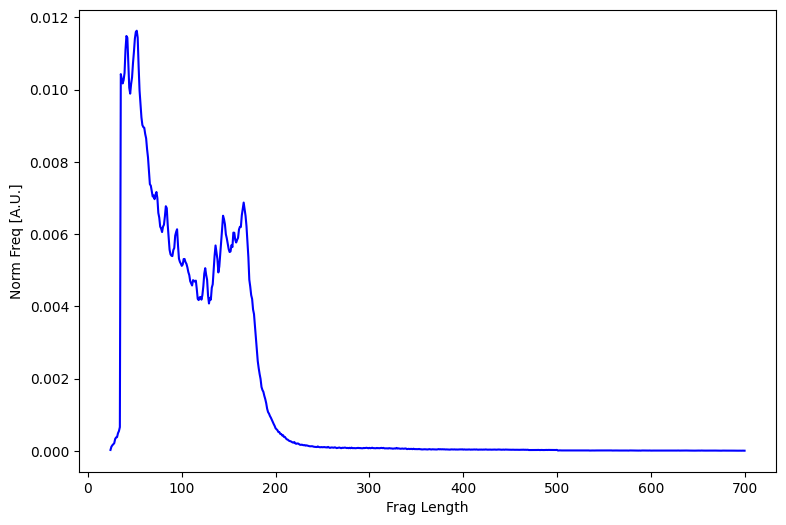

In [ ]:
data = pd.read_csv('./data/query1.bed', sep='\t', header=None, low_memory=False)

counts = Counter(data.iloc[:, 2]-data.iloc[:,1])
total = sum(counts.values())
norm_frequency = {key: value / total for key, value in counts.items()}

# separating keys and values
x2, y2 = zip(*sorted(norm_frequency.items()))
data_nor = pd.DataFrame({'Frag Length': x2, 'Norm Freq': y2})

# now I'm plotting it
plt.figure(figsize=(9, 6))
plt.plot(data_nor.iloc[:,0], data_nor.iloc[:,1], color='blue')
plt.xlabel('Frag Length')
plt.ylabel('Norm Freq [A.U.]')
plt.show()

### b) Rescaling

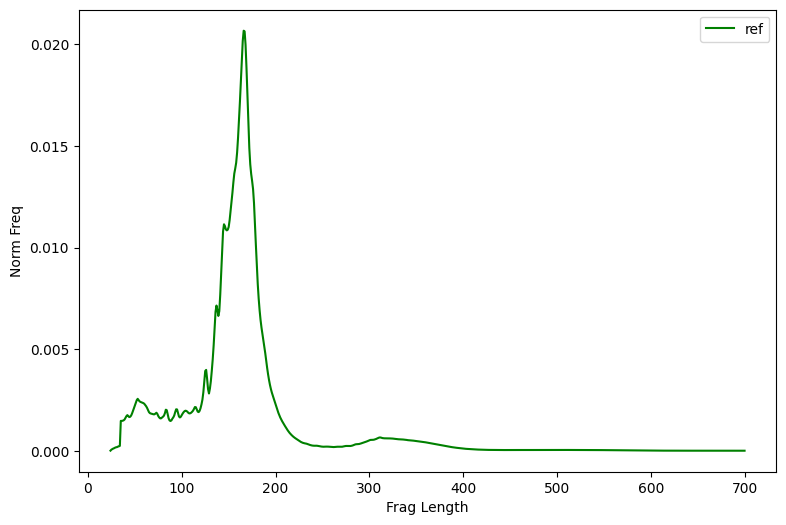

In [8]:
# having a look at how it looks initially
ref = pd.read_csv('./data/reference.hist', sep='\t', header=None)

plt.figure(figsize=(9, 6))
plt.plot(ref.iloc[:,0], ref.iloc[:,1], color='green',label='ref')
plt.legend()
plt.xlabel('Frag Length')
plt.ylabel('Norm Freq')
plt.show()

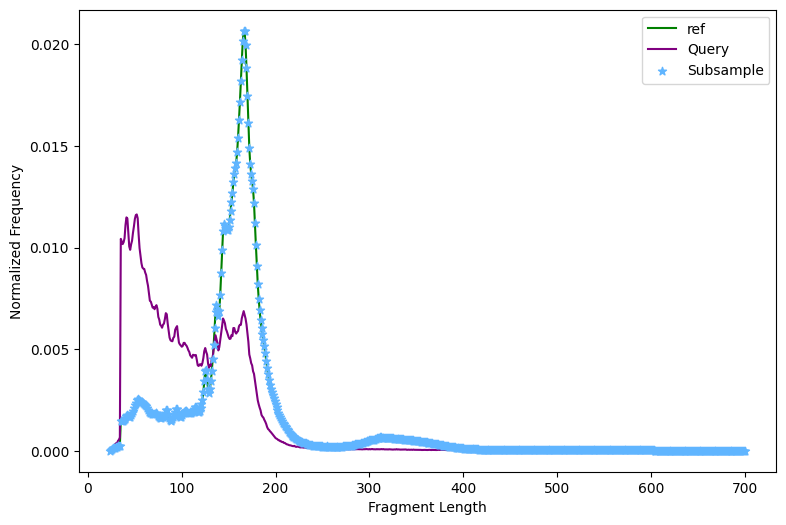

In [9]:
# dataframe to store new samples
sampled_rows = []

bins = list(range(0, 720, 10)) # bins (Starting pts)
labels = [f"{i}-{i+10}" for i in range(0, 710, 10)]  # corres. labels of bins

# Bining given data into a new col
data_nor['bin'] = pd.cut(data_nor.iloc[:,0], bins=bins, labels=labels, right=False)
ref['bin'] = pd.cut(ref.iloc[:,0], bins=bins, labels=labels, right=False)

# Count values in each bin
query_counts = data_nor['bin'].value_counts().sort_index()
ref_counts = ref['bin'].value_counts().sort_index()

# For each bin, sampling the min(count from data_nor, count from ref)
for bin_label in labels:
    count_query = query_counts.get(bin_label, 0)
    count_ref = ref_counts.get(bin_label, 0)

    sample_size = min(count_query, count_ref)

    if sample_size > 0:
        ref_bin_rows = ref[ref['bin'] == bin_label]
        sampled = ref_bin_rows.sample(n=sample_size, random_state=42)
        # interesting story behind chosing 42 : https://www.kaggle.com/discussions/general/336747
        sampled_rows.append(sampled)

result= pd.concat(sampled_rows, ignore_index=True) # to combine all rows to a datafram

plt.figure(figsize=(9, 6))
plt.plot(ref.iloc[:,0], ref.iloc[:,1], color='green',label='ref', zorder=1)

plt.plot(x2, y2, color='purple',label='Query', zorder=1)
plt.scatter(result.iloc[:,0], result.iloc[:,1], color='#60B5FF',label='Subsample',marker="*")
plt.legend()
plt.xlabel('Fragment Length')
plt.ylabel('Normalized Frequency')
plt.show()

matches quite well with what's expected.